#                        Projet sur les cantines

### 1 - Consignes et livrables

Travail de groupe de 3 personnes. 

Pour l'évaluation CC, chaque groupe doit livrer à la fin des sessions :

    - un rapport synthétisant l'analyse faite et les conclusions obtenues
    
    - un notebook nettoyé et commenté

### 2 - Brief du projet 

La cuisine centrale de Nantes Métropole produit 
###### par jour entre 15 000 et 16 000 repas qui sont livrés dans 87 établissements.
###### Les familles ont la possibilité d’inscrire ou non les enfants le jour même. 

Ce système entraine une grande variabilité dans la fréquentation. 
###### Celle-ci est effectivement impactée  par  le  contexte  sanitaire,  la  composition  des  menus,  le  jour  de  la  semaine,  la  période  de  l’année...  

Cette  variabilité  contraint  les
cantines, très en amont (S-3), à estimer systématiquement le nombre de convives. Ces estimations servent à évaluer les quantités à commander
aux fournisseurs. Un constat : 
##### le gaspillage alimentaire sur l’ensemble de la métropole est passée de 5% en moyenne entre 2011 et 2016 à 8% sur 2017-2019.

En tant que responsable des finances de la cuisine, vous voulez réduire ce gaspillage de surproduction pour faire des économies.  
##### Un repas coûte en matière première 3 euros. 

### Vous allez donc analyser les données afin de :
    - trouver les facteurs qui influencent la fréquentation des cantines
    - essayer de proposer une solution pour réduire le gaspillage (un modèle statistique par exemple).

### 3 - Organisation du service 

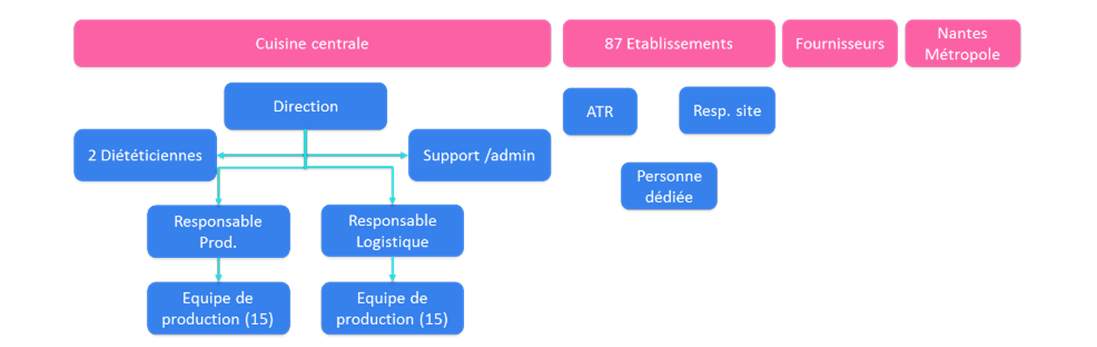

### 4 - Processus actuel

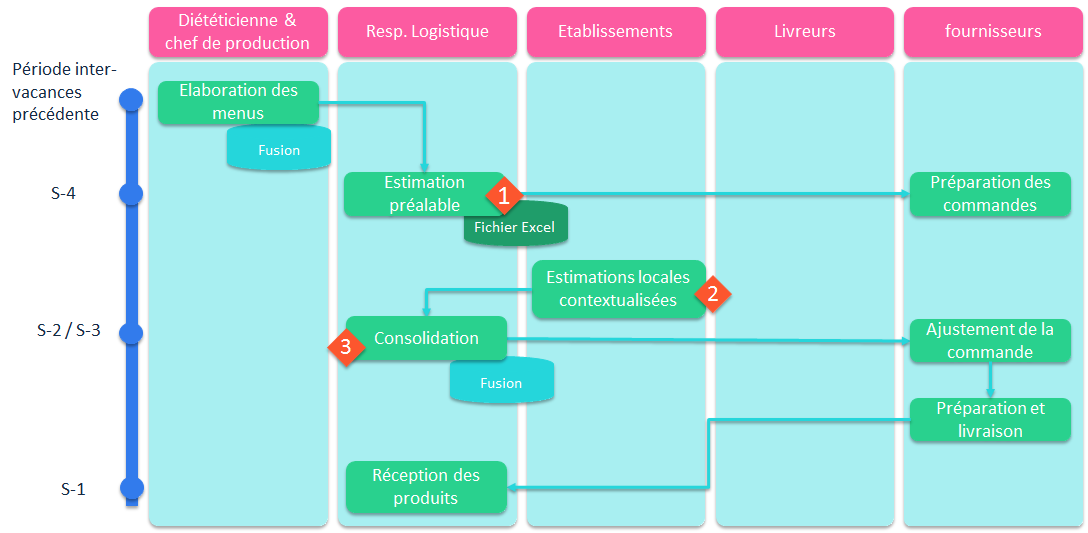

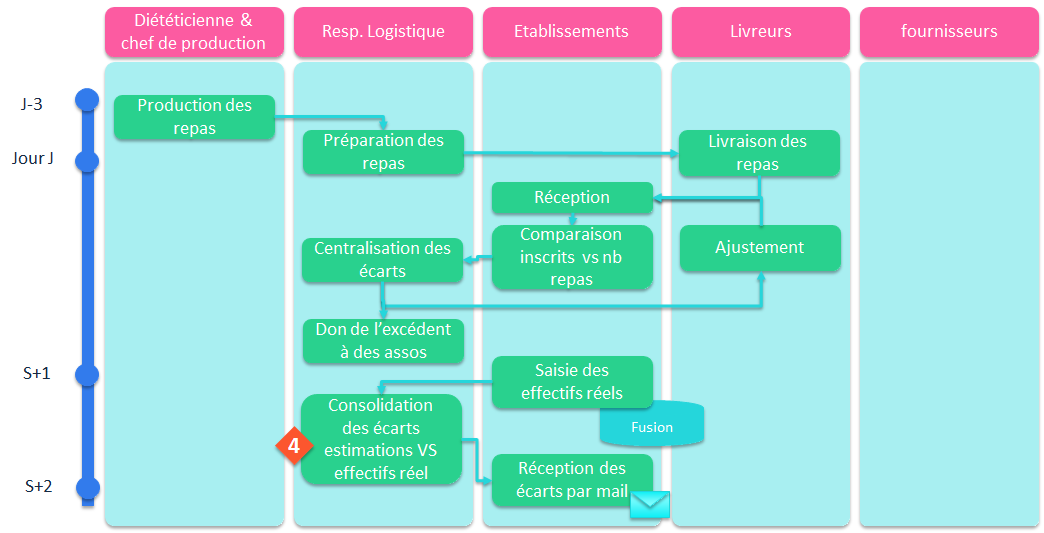

Les entêtes de colonnes indiquent les acteurs mobilisés ; 

l’axe vertical à gauche du graphique indique la position de chaque étape par rapport au jour de consommation (S = semaine et J = jour) ; 

les blocs verts indiquent les étapes du processus de planification, réalisation et suivi de la production  ; les blocs bleus indiquent les outils numériques utilisés ; 

les losanges orange indiquent les étapes auxquelles les outils de modélisation peuvent être utilisés.

Les quatre losanges mis en évidence en orange sur le schéma représentent les étapes auxquelles des interactions peuvent être développées entre l’outil de modélisation statistique et le processus de préparation des repas de la cuisine centrale à Nantes. 

Une fois les menus pour une période intervacances validés par la commission de restauration, ils sont transmis au responsable logistique. Celui-ci réalise des estimations globales de la fréquentation attendue et passe ses commandes auprès des fournisseurs locaux environ un mois à l’avance. L'objectif de votre travail est de fiabiliser cette étape (losange 1) à l'aide d'un modèle statistique.



### 5 - Votre mission 


- Analyser le jeu de données afin de repérer des variables pertinentes pour la mission. 

- Tout au long de l’analyse, produire des visualisations afin de mieux comprendre les données. 

- Nettoyer le jeu de données : 
    - identifier les colonnes inutiles (variables non pertinentes)
    - vérifier si toutes les lignes sont exploitables 
    
- Effectuer une analyse univariée pour chaque variable intéressante, afin de synthétiser son comportement.
- Variez les graphiques (boxplots, histogrammes, diagrammes circulaires, nuages de points…) pour illustrer au mieux votre propos.

- Confirmer ou infirmer les hypothèses à l’aide d’une analyse multivariée (plusieurs variables). 
    - Le plus important sera de déterminer les facteurs qui jouent le plus sur la fréquentation.

- Identifier des arguments justifiant la faisabilité d'une fiabilisation des commandes en utilisant un modèle statistique.
    - Est-ce possible d'après vous ?






### 6 - Recommandation

###### Le nombre de repas consommés par jour dépend fortement de l’effectif global (somme des effectifs de 87 établissements), or cet effectif a évolué sur les 10 ans d’historique. 

Pour les analyses, je vous recommande de créer dans votre dataframe une colonne correspondant à la *fréquentation*, c’est-à-dire au nombre de repas consommés par jour divisé par l’effectif global. En analysant la fréquentation, on ne tient pas compte de l’effet d’échelle de l’effectif.


# PRODUCTION

## Membres du Groupe4

- Mafanta JAITEH JAITEH

- Faithgot GLIN-DAYI

- Govinda AGBAHE

- Kengni Théophane 



### Importation des bibliothèques nécessaires pour le projet

In [1]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import seaborn
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.api

### Importation des données du fichier frequentation.csv

In [2]:
frequentation = pd.read_csv("frequentation.csv")

### Création de la colonne frequentation 

In [3]:
frequentation["frequentation"] = frequentation.reel / frequentation.effectif *100

### Importation des données du fichier menu.csv

In [4]:
menus = pd.read_csv("menus.csv")

In [5]:
frequentation.describe(include ="all")

,Unnamed: 0,date,annee_scolaire,jour,semaine,mois,greves,ferie,veille_ferie,retour_ferie,...,ramadan,fete_chretienne,fete_juive,inc_grippe,inc_gastro,inc_varicelle,prevision,reel,effectif,frequentation
count,1188.000000,1188,1188,1188,1188.000000,1188,1188.000000,1188.000000,1188.000000,1188.000000,...,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000
unique,NaN,1188,10,5,NaN,11,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-03,2012-2013,Vendredi,NaN,Septembre,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,141,300,NaN,146,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,593.500000,NaN,NaN,NaN,25.842593,NaN,0.088384,0.000842,0.013468,0.021044,...,0.055556,0.076599,0.027778,2346.518519,4212.135522,706.073232,13696.729798,12837.773569,18890.589226,67.852347
std,343.090367,NaN,NaN,NaN,15.877945,NaN,0.283972,0.029013,0.115316,0.143591,...,0.229158,0.266067,0.164405,4778.634345,2627.853230,1067.539442,2527.794888,2490.102028,1013.282762,12.481810
min,0.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17373.000000,0.000000
25%,296.750000,NaN,NaN,NaN,12.000000,NaN,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,2179.000000,103.000000,13167.250000,12389.750000,17955.000000,68.435838
50%,593.500000,NaN,NaN,NaN,24.000000,NaN,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,371.000000,3458.000000,415.000000,13991.000000,13184.000000,18633.000000,70.311207
75%,890.250000,NaN,NaN,NaN,41.000000,NaN,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1910.000000,5858.000000,921.000000,14910.000000,14016.500000,19958.000000,72.279556


In [6]:
#Juste pour afficher toutes les lignes et colonnes
pd.set_option('display.max_row',1200)
pd.set_option('display.max_column',111)

### Jointure des données

In [7]:
jeu_de_donnees = pd.merge(frequentation,menus,  on = 'date', how= 'outer', indicator=True)

## Informations de base


### Analyse de forme

- **Variable target** : frequentation
- **Ligne,Columns** : jeu_de_donnees.shape = (1188, 34)
- **Type de variables** : jeu_de_donnees.dtypes.value_counts() => 28 quantitatives & 6 qualitatives
- **Analyse des valeurs manquantes** : Aucune donnée manquante, dataframe complet


### Analyse de fond et Hypothèses :

- **Visualisation de la target** :

    - Peu de densité entre 0 et 60%.
    
    - Données quasi-condenscées entre 60% et 80% pour la fréquentation.
    
- **Signification des variables** :

    - Pour les autres variables, on ne sent rien à interpréter seulement que le "poisson" et la "viande" viennent très souvent dans le menu alors que "an_chinois" très rarement et que "porc","bio" moins souvent préparés, il y a peut-etre un petit lien à soulever dans la suite.
    
    - Vu les évolutions de "inc_grippe" et "inc_varicelle", ils sont quasi aléatoires et à vue d'oeuil, on ne les pensent pas affecter sur la présence des enfants à la cantine.
    
    - Les fetes chrétiennes quant à elles sont restés presque les memes au cours des années tandisque la courbe de celles musulmanes a un peu changer.
    
- **Relation Variables/Target** :

    **Notre objectif est de trouver les élements qui influencent sur la frequentaion. Pour ce fait, on se basera sur la covariance entre ses élements et la frequentation s'ils ont des données quantitatives et l'anova s'ils ont des données qualitatives/catégorielles.** << Pour cette étude d'anova, on recherche en fait une Rsquare un peu au dessus de zero, on ne cherche pas forcément une nuance de gris proche de 1 pour dire qu'il y relation entre la variable ou pas puisque c'est plusieurs informations rasssemblées en fait qui nous donne le résultat qu'il nous faut; On considère donc toute Rsquare supérieure 10e-2 considérable pour ce projet; inférieure à cette valeur ou à l'ordre de 10e-3 on considère que c'est zero et il n'y a donc pas de liens utils pour nous entre cet element et la présence des enfants à la cantine.>>
    
    +++++ **Data Cleaning** +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
    
    - Selon l'anova et une analyse logique :
        - Les jours de **grèves** ne sont pas controlés;
        
        - Il n'y a pas de fréquentation les jours **féries**;
        
        - La **prédiction** ne nous interessera pas dans l'étude des facteurs influencant la frequentation.
        
         **Ceux sont donc des données à négliger dans notre analyse**
         
    - Les lignes des **jours Mercredi**, des **jours où il y a grève** et des **jours du mois de juillet** ne sont pas controlables, ils ont été retiré dans le nettoyage de notre dataframe (raisons détaillées plus bas dans le développement).
    
    ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
        
        D'après analyse,
    
    - Il y a généralement plus d'enfants à la quantine les **_vendredis_** que les autres **jours** de la semaine, et l'anova nous donne une **Rsquare = 0.3616132385516222** donc très considérable.
    
    - On observe une très faible correlation entre les variables "**frequentation**","**inc_grippe**","**inc_varicelle**", et on peut peut-etre suggérer qu'ils n'ont rien à voir sur la présence ou non des enfants à la cantine alors qu'en regardant "**inc_gastro**" on constate que sa correlation est un peu élevée par rapport à la frequentation, c'est un facteur à noter donc (cf~Matrice de correlation).
        **La variation du "gastro" intervient dans la présence des enfants à la cantine scolaire**
       
    - Selon l'étude des diagrammes d'anova et de la Rsquare pour chacun des facteurs comme : **veille_ferie, retour_ferie, vacances, retour_vacances, veille_vacances, fete_musulmane, ramadan, fete_chretienne, fete_juive, frites, **, on remarque qu'elle ne présente pas de conclusion particulière et la valeur de la Rsquare pour chacun d'eux est sensiblement égale à zero. Elles n'influent donc pas vraiment sur la présence des enfants à la cantine.
        Par contre, la fréquentation :
        - entre les jours où il y a **poisson** et les jours y'a pas poisson est décalée au sens où 
            - Il y a plus d'enfants les jours où il y a viande que les jours où il y'en a pas.
            - De plus la Rsquare = 0.20331310814359113 >> 0
              
        - entre les jours où il y a **viande** et les jours y'a pas viande;
            - Il y a moins d'enfants les jours où il y a poisson que les jours où il y'en a pas.
            - De plus la Rsquare = 0.24807087877446377 >> 0
            
        - entre les jours où il y a **noel** et les jours y'a pas noel;
            - Il y a plus d'enfant les jours où il y a noel que les jours où il y'a pas noel.
            - De plus la Rsquare = 0.03149481997253474 >> 0
            
        - entre les jours où il y a **porc** et les jours où y'en a pas.
            - L'évolution de la frequentation les jours où il y a porc que les jours où il y'a pas porc.
            - De plus la Rsquare = 0.030970856562048586 >> 0

        - entre les jours où il y a **bio** et les jours y'a pas bio est décalée au sens où 
            - Il y a plus d'enfants les jours où il y a un mene bio que les jours où il y'en a pas.
            - De plus la Rsquare = 0.018860155957805314 >> 0
 
        - entre les **mois**;
            - Il y a moins d'enfants en générale les autres mois que Décembre donc un petit facteur à noter.
            - De plus la Rsquare = 0.11104436147513683 >> 0            
      **Ce qui pour amène vers l'hypothèse que la noel, la viande, le porc, bio, le mois, le jour et le poisson dans le menu influencent sur la présence des enfants à la cantine**
         
    
### Le Développement

👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇

##### Obtenir le nombre des différents types de variables.

In [8]:
jeu_de_donnees.dtypes.value_counts() 

int64       27
object       5
float64      1
category     1
Name: count, dtype: int64

# Data Cleaning

#### Suppression des quelques "mercredis" apparents
        - Ils sont très peu et pourront fausser nos calculs

In [9]:
jeu_de_donnees.drop(index=jeu_de_donnees.index[jeu_de_donnees.jour == "Mercredi"],inplace=True)

#### Conservons les jours d'une fréquence supérieure à 60% pour obtenir un jeu de données fluide et plus cohérent

In [10]:
df = jeu_de_donnees[jeu_de_donnees["frequentation"]>=60]

In [11]:
#Ceci donne en moyene le nombre de donnée par année des mois de Juin et juillet par exemple
len(df[df.mois=="Juin"])/9, len(df[df.mois=="Juillet"])/9 #9 etant le nombre d'année d'étude de la population

(13.555555555555555, 1.3333333333333333)

##### Supression des données du mois de Juillet (peu de données & periode de vaccances) qui sont succeptibles de fausser nos calculs.

In [12]:
df.drop(index=df.index[df.mois == "Juillet"],inplace=True)

/var/folders/21/1mbh6mns6s38cwt4bq4f7dl40000gn/T/ipykernel_20982/3354524701.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(index=df.index[df.mois == "Juillet"],inplace=True)


### Visualisation de l'évolution des variables au fil des jours.

/var/folders/21/1mbh6mns6s38cwt4bq4f7dl40000gn/T/ipykernel_20982/635803521.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


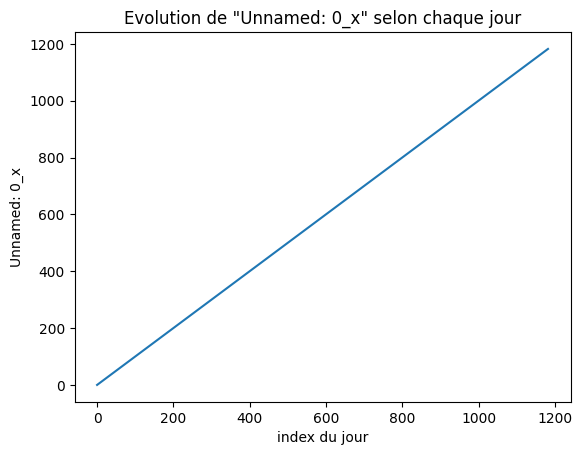

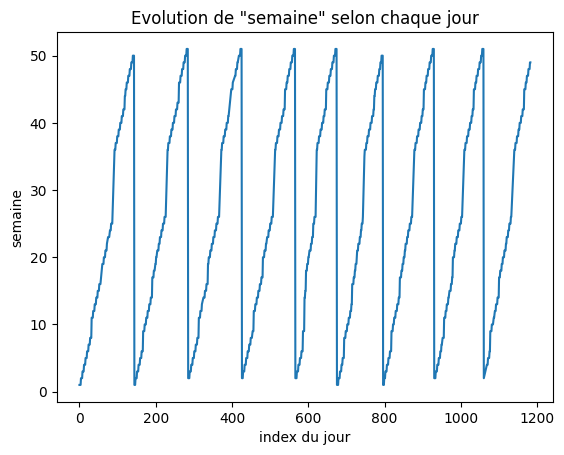

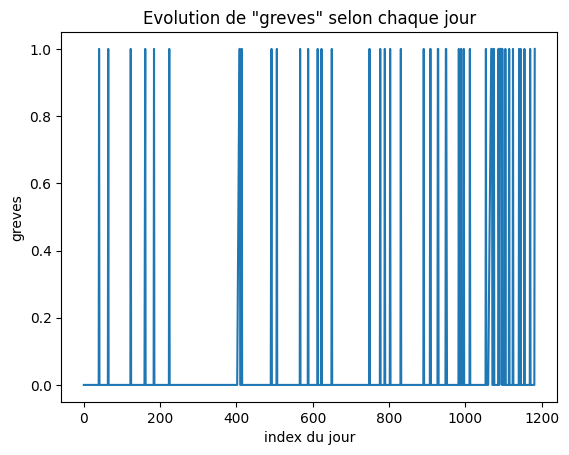

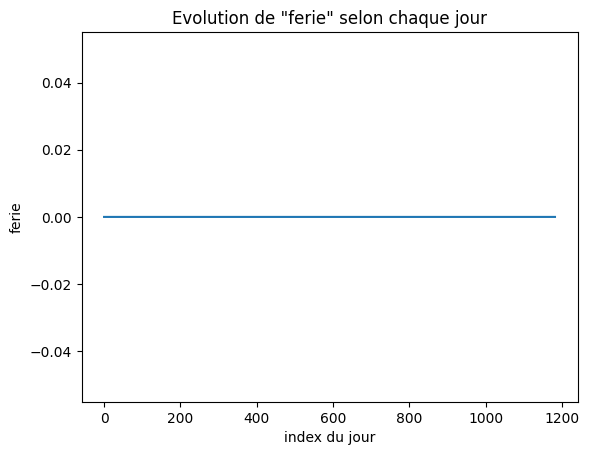

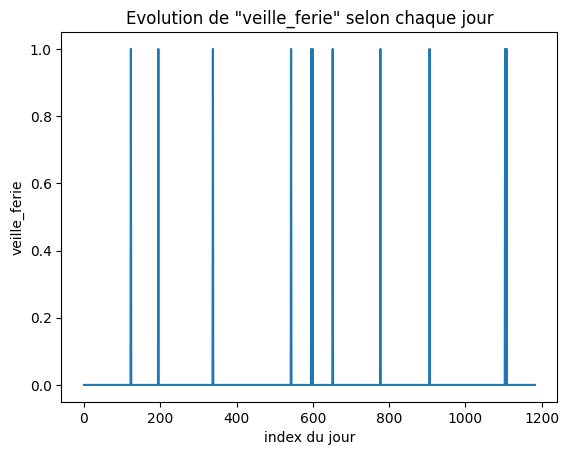

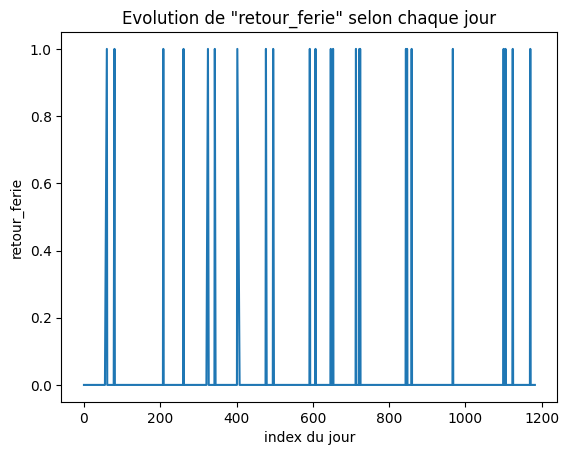

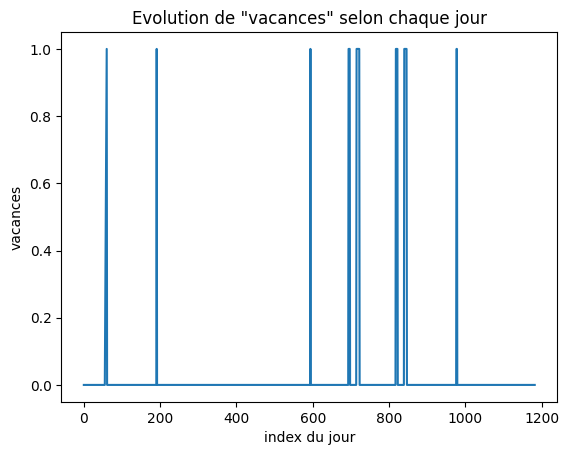

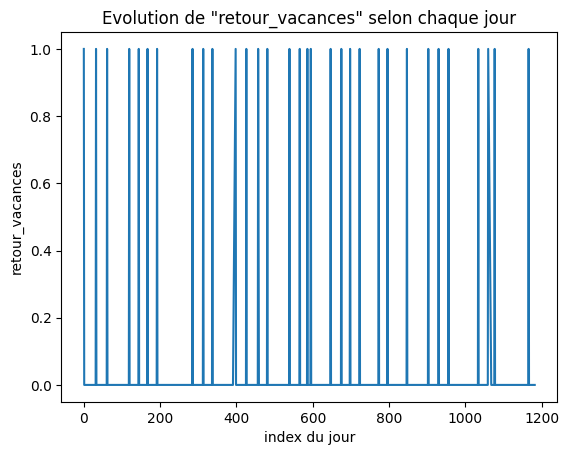

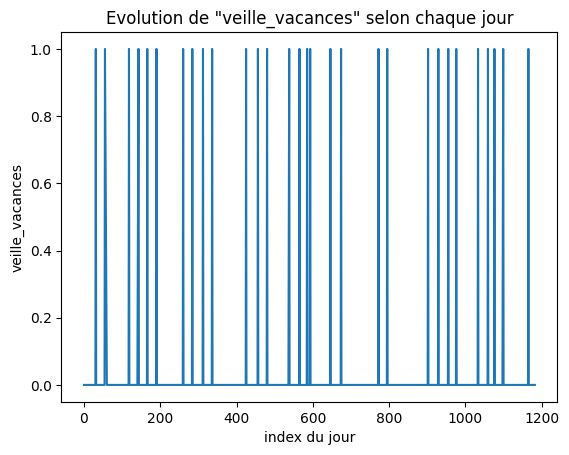

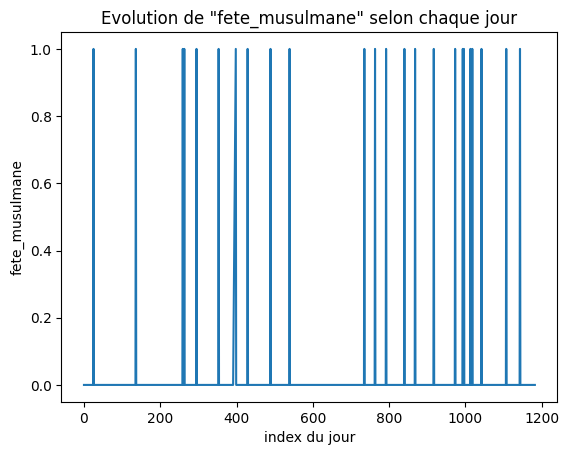

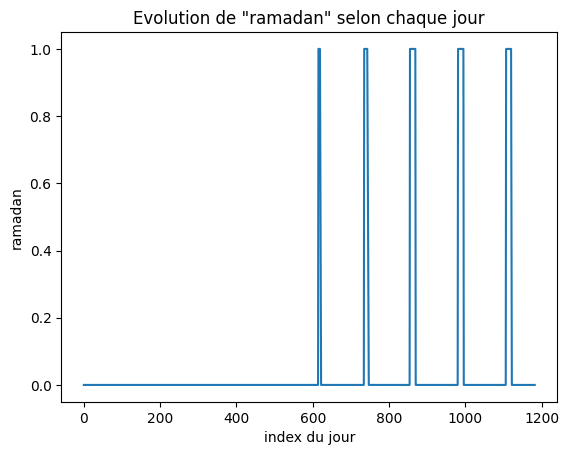

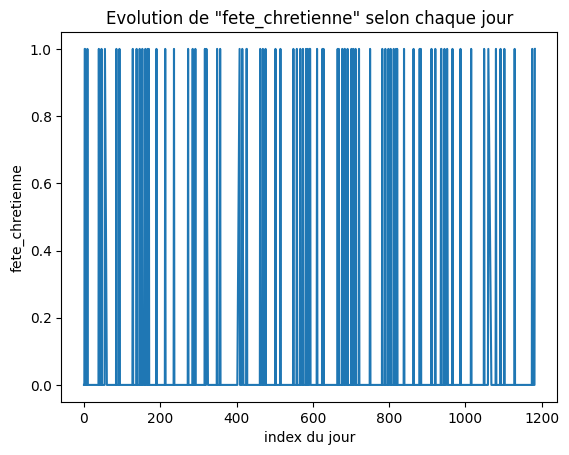

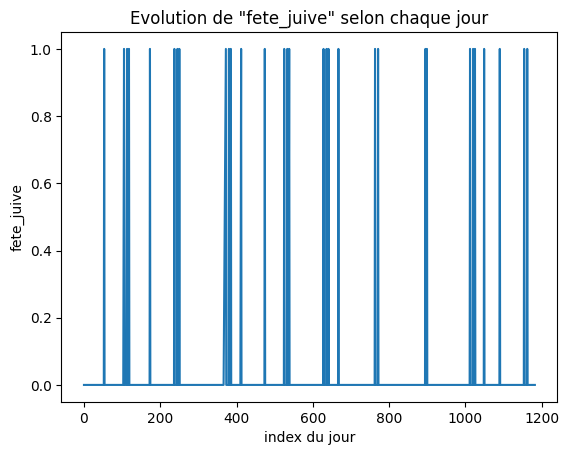

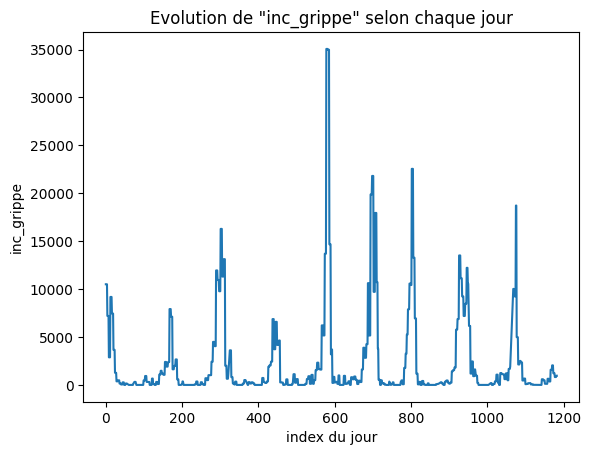

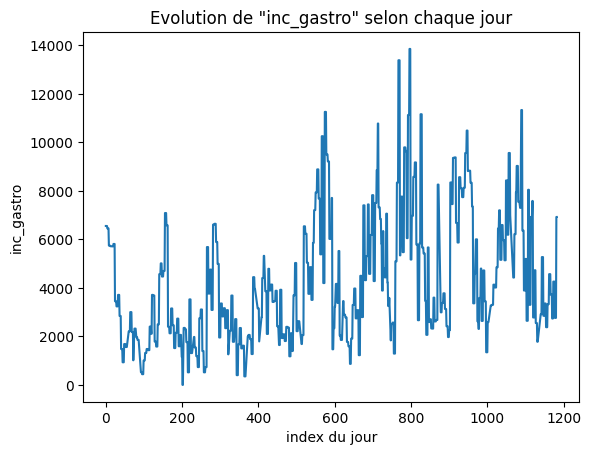

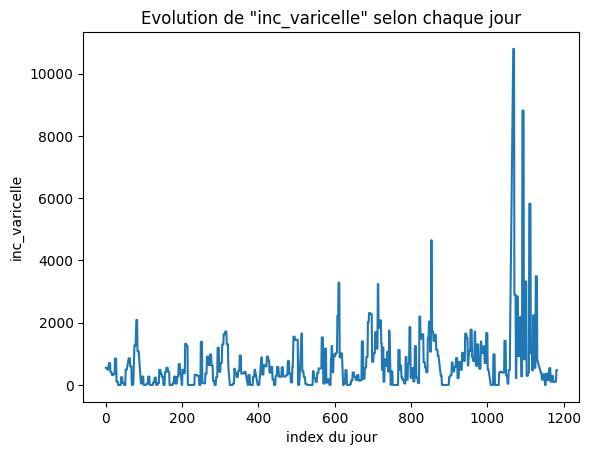

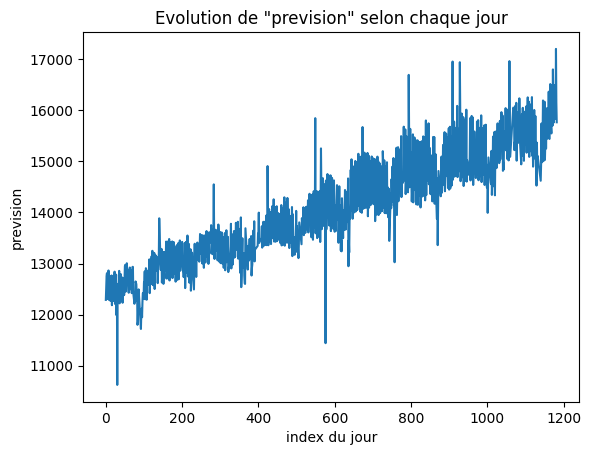

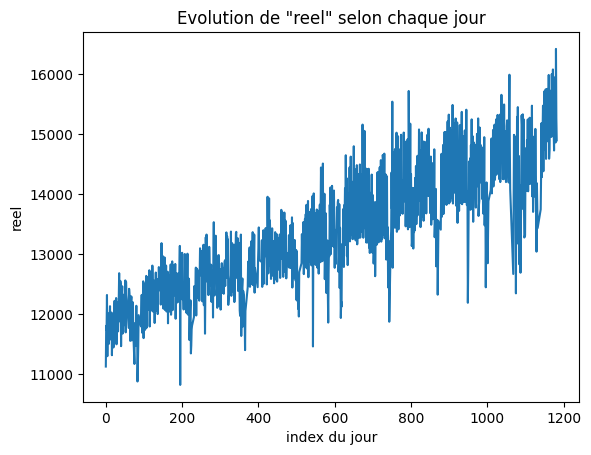

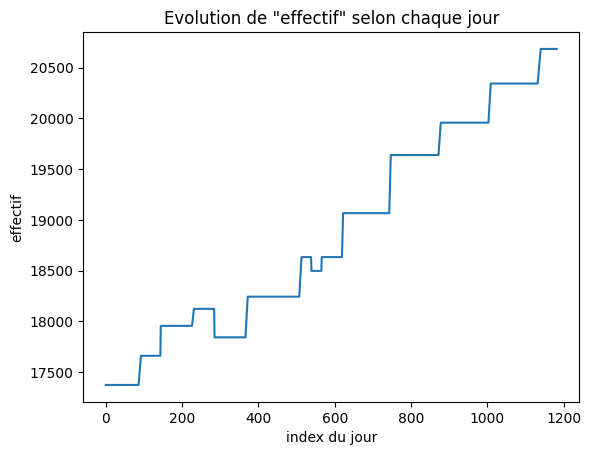

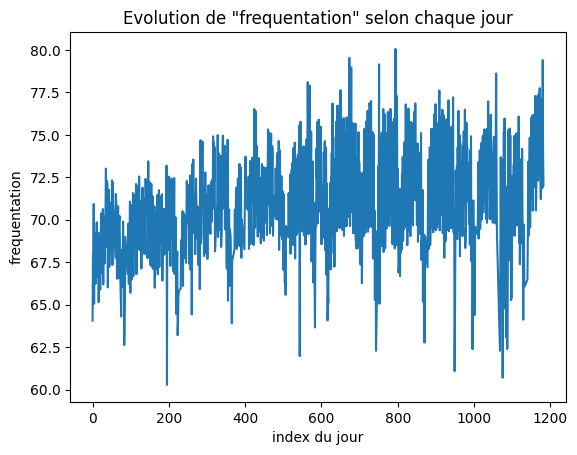

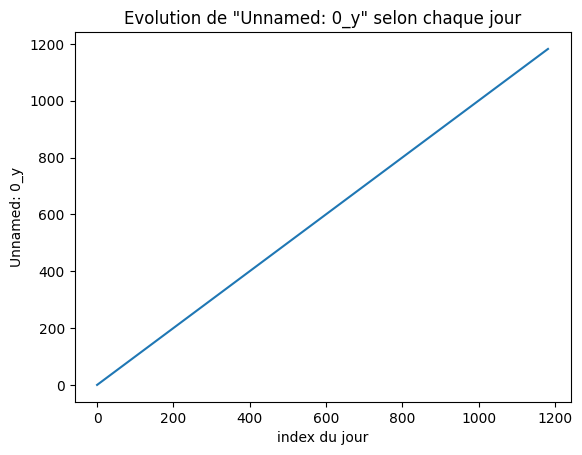

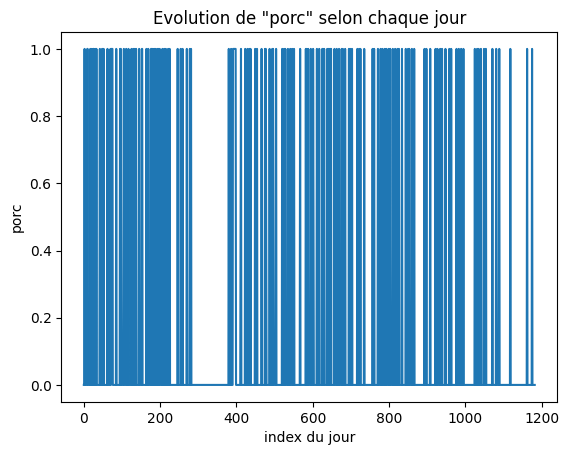

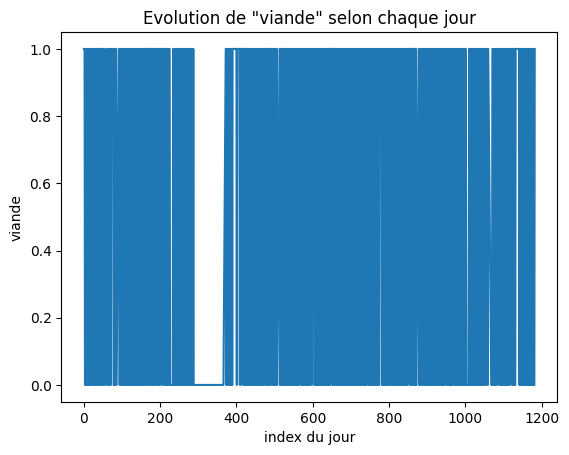

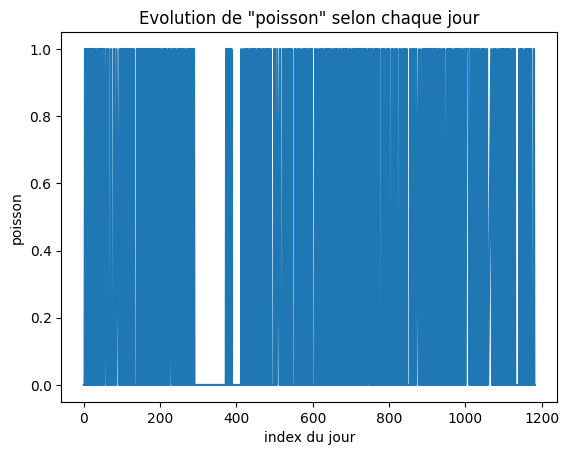

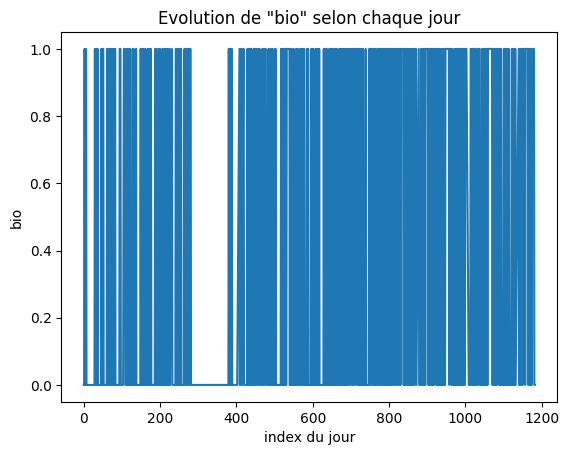

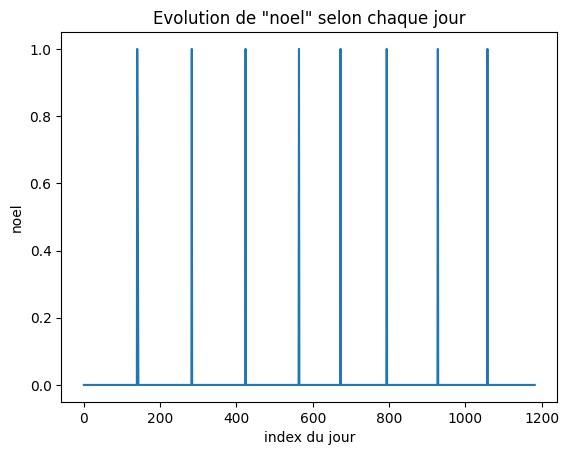

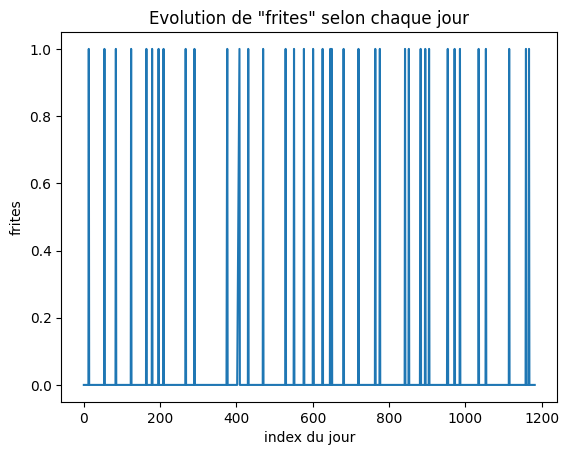

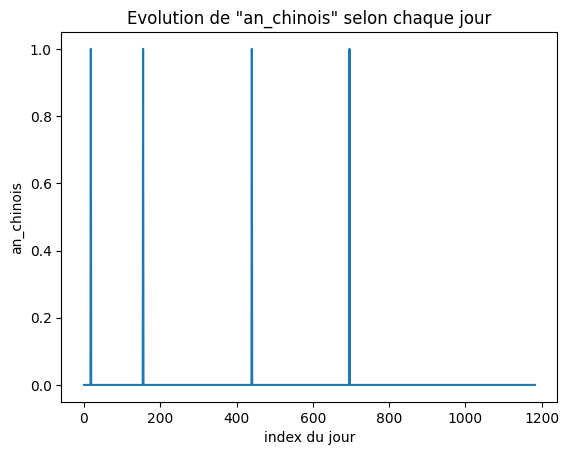

In [13]:
for col in df.select_dtypes(['float','int','string']):
    plt.figure()
    df[col].plot(title=f'Evolution de "{col}" selon chaque jour',ylabel= col,xlabel="index du jour")
  

## Relation entre la variable frequentation et les autres variables.

### Quelques fonctions nous simplifiant la vie pour la suite

In [14]:
def eta_squared(x,y):
    moyenne_y=y.mean()
    classes =[]
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni':len(yi_classe),'moyenne_classe':yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT

In [15]:
def afficheur_du_diagramme_d_Anova (X,Y):
    liste = []
    for ms in df[X].unique():
        liste.append(df[df[X]== ms][Y])
        
        # Vous pouvez décommenter les trois prochaines lignes pour mieux lire les données des graphes.
        #print("--"*20)
        #print(f"La moyenne de {Y} pour {X} = {ms} est {df[Y][df[X]== ms].mean()}")
        #print(f"La médiane de {Y} pour {X} = {ms} est {df[Y][df[X]== ms].median()}")
    plt.figure(figsize=(7,7))
    medianprops ={'color':'black'}
    meanprops ={"marker":"o","markeredgecolor":"black","markerfacecolor":"firebrick"}
    plt.boxplot(liste,labels= df[X].unique(),showfliers=False,vert=False,patch_artist=True,showmeans=True,
               meanprops=meanprops,medianprops=medianprops)
    plt.legend("M")
    plt.show()
    print("+-*-"*35)
    print(f"la R_Square entre les variables {X} et {Y} est: {eta_squared(df[X],df[Y])}.")

In [16]:
def suppression_colonne_modelisation (nom) :
    df_train.drop([nom], axis=1, inplace=True)
    df_test.drop([nom], axis=1, inplace=True)
    df_test_a_prevoir.drop([nom], axis=1, inplace=True)

In [17]:
def suppression_lignes_modelisation (colonne,valeur) :
    df_train.drop(index=df_train.index[df_train[colonne] == valeur],inplace=True)
    df_test.drop(index=df_test.index[df_test[colonne]== valeur],inplace=True)
    df_test_a_prevoir.drop(index=df_test_a_prevoir.index[df_test_a_prevoir[colonne] == valeur],inplace=True)  

### La fréquentation et les greves

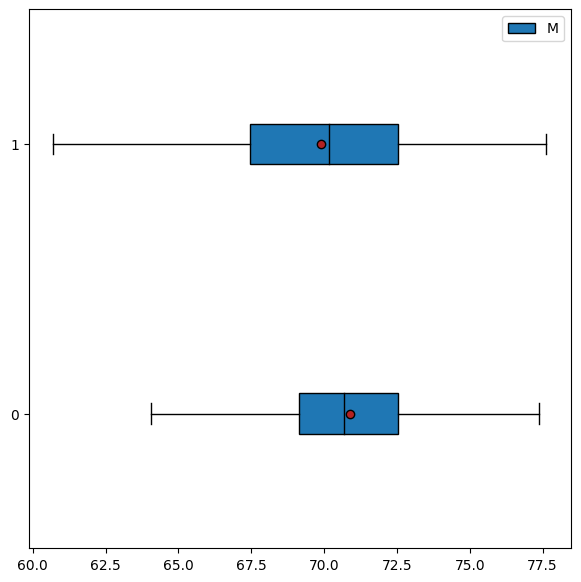

+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-
la R_Square entre les variables greves et frequentation est: 0.005644198591062318.


In [18]:
X = "greves"
Y = "frequentation"
afficheur_du_diagramme_d_Anova (X,Y)

##### Supression 
    - de la colonne des grèves qui ne semblent pas suivre une logique car elle ne peut etre controlée.
    - des lignes où il y a greve car elles influenceront les résultats

In [19]:
df.drop(index=df.index[df.greves==1],inplace=True) # SUPPRESSION DES LIGNES

df.drop(["greves"], axis=1, inplace=True) ## SUPPRESSION DE LA COLONNE


/var/folders/21/1mbh6mns6s38cwt4bq4f7dl40000gn/T/ipykernel_20982/915852426.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(index=df.index[df.greves==1],inplace=True) # SUPPRESSION DES LIGNES
/var/folders/21/1mbh6mns6s38cwt4bq4f7dl40000gn/T/ipykernel_20982/915852426.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(["greves"], axis=1, inplace=True) ## SUPPRESSION DE LA COLONNE


### L'histogramme de la fréquentation après netoyage

<Axes: >

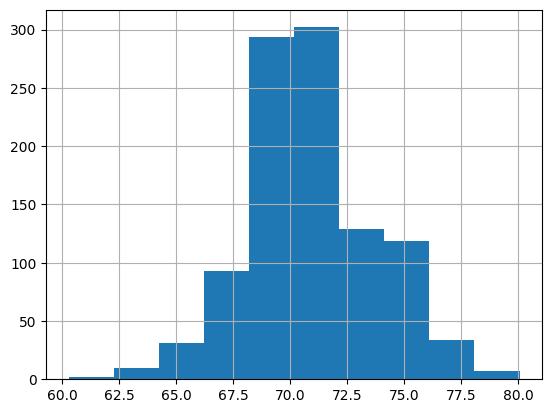

In [20]:
df.frequentation.hist()

# Détermination des variables qui influencent sur la frequentation

### Tableau de corrélation entre certaines variables et notre variable target

<Axes: >

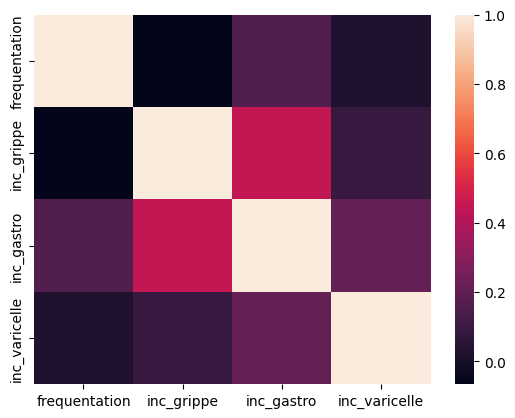

In [21]:
seaborn.heatmap(df[["frequentation","inc_grippe","inc_gastro","inc_varicelle"]].corr())

#### Le script qui suit pouvait nous permettre de parcourir les menus de chaque ligne et créer une colonne pour donner la valeur 1 quend l'élement est dans le menu  mais 

In [22]:
# df["thon"] = df.viande  <=========== Là, on l'instensiera avec les valeurs initiales de viande

#for i in df["Unnamed: 0_x"]:
    #if "thon" in df.menu[i]:
        # df["thon"][i] = 1
   # else :
        # df["thon"][i] = 0

In [23]:
df.menu.describe().unique

<bound method Series.unique of count     1021
unique     946
top         []
freq        74
Name: menu, dtype: object>

### 946 menus différents, impossible de checker et d'étudier une composition exacte de chaque menu afin de déduire son impact sur la frequentation.
##### Il est donc préférable de faire notre étude sans toucher au menu et de se concentrer sur les aliments et types d'aliments spécifiques qu'on nous a déjà présenté. 

### Etudions donc la fréquentation et les : viande, porc, poisson, bio, noel, frites


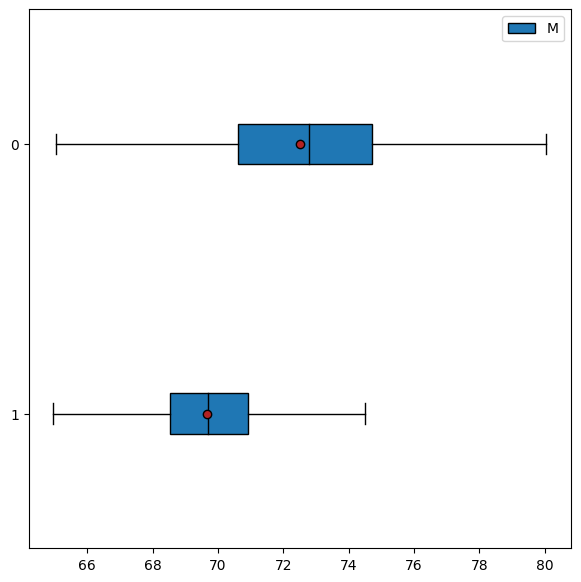

+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-
la R_Square entre les variables viande et frequentation est: 0.24807087877446377.


In [24]:
X = "viande"
Y = "frequentation"
afficheur_du_diagramme_d_Anova (X,Y)

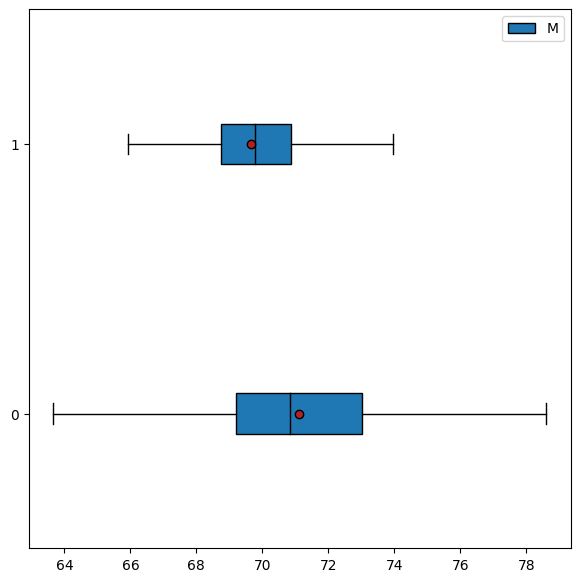

+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-
la R_Square entre les variables porc et frequentation est: 0.030970856562048586.


In [25]:
X = "porc"
Y = "frequentation"
afficheur_du_diagramme_d_Anova (X,Y)

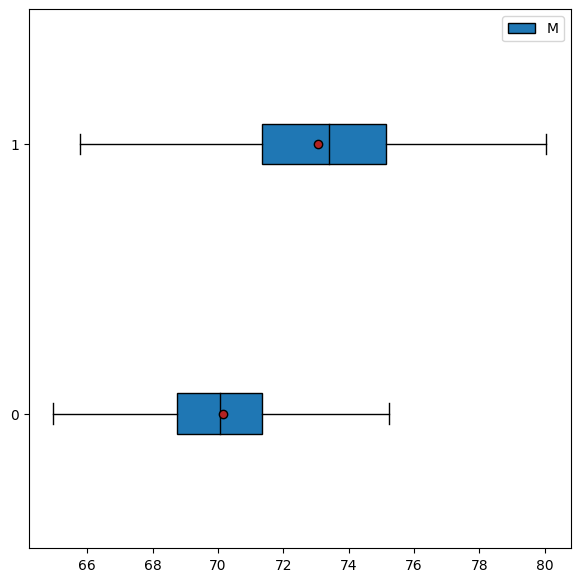

+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-
la R_Square entre les variables poisson et frequentation est: 0.20331310814359113.


In [26]:
X = "poisson"
Y = "frequentation"
afficheur_du_diagramme_d_Anova (X,Y)

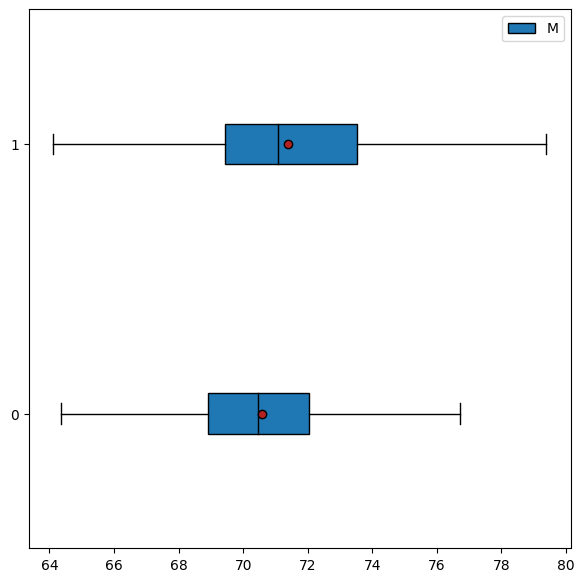

+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-
la R_Square entre les variables bio et frequentation est: 0.018860155957805314.


In [27]:
X = "bio"
Y = "frequentation"
afficheur_du_diagramme_d_Anova (X,Y)

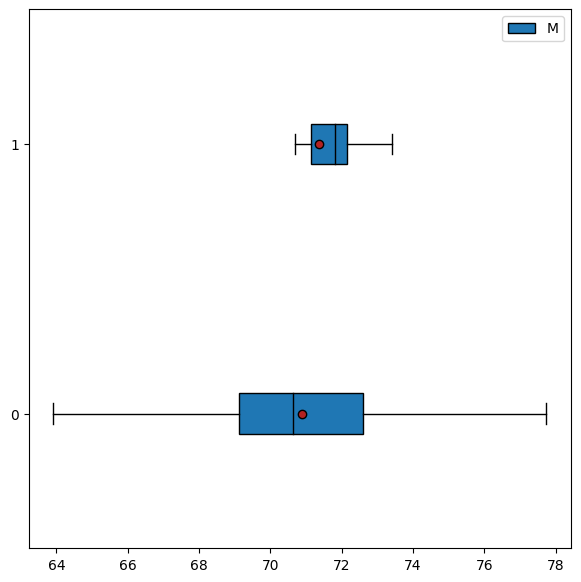

+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-
la R_Square entre les variables frites et frequentation est: 0.0009202531611391425.


In [28]:
X = "frites"
Y = "frequentation"
afficheur_du_diagramme_d_Anova (X,Y)

In [29]:
df.vacances[df.vacances==1].count()

29

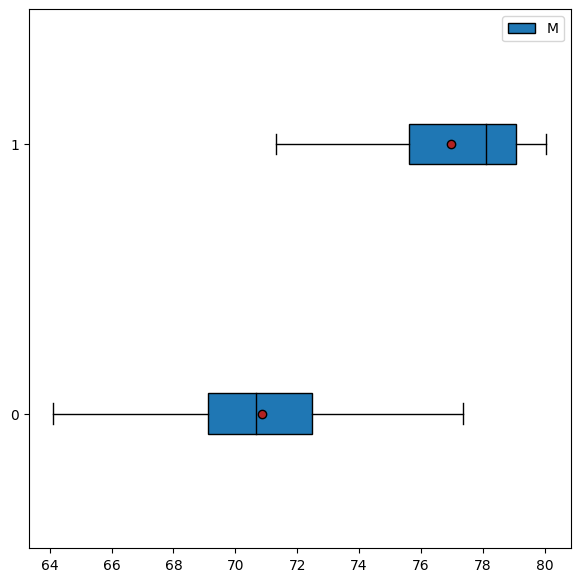

+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-
la R_Square entre les variables noel et frequentation est: 0.03149481997253474.


In [30]:
X = "noel" 
Y = "frequentation"
afficheur_du_diagramme_d_Anova (X,Y)

In [ ]:
df

### La fréquentation par rapport aux mois ou période de l'année. ( Anova entre les mois et le taux de frequentation)

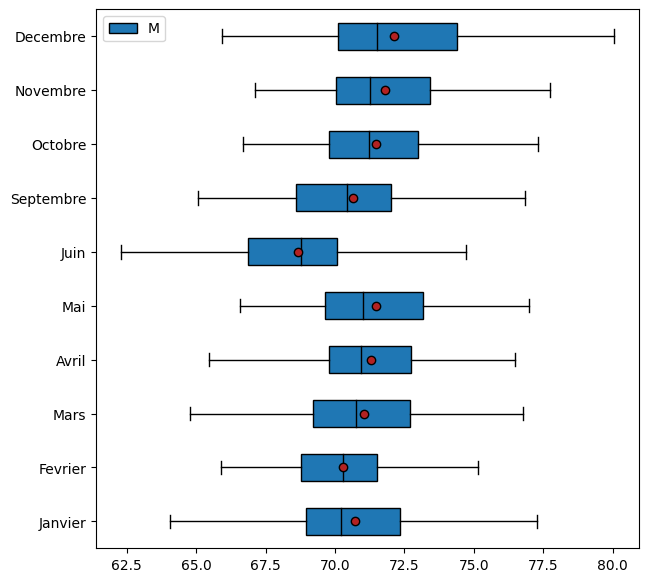

+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-
la R_Square entre les variables mois et frequentation est: 0.11104436147513683.


In [32]:
X = "mois" # qualitative
Y = "frequentation" # quantitative
afficheur_du_diagramme_d_Anova (X,Y)

#### Les semaines ne se controlent vraiment pas donc on focalise notre analyse que sur les jours et les mois et on reste donc là pour les valeurs temporelles.

### Etudes de certains jours importants

##### Les jours de ramadan

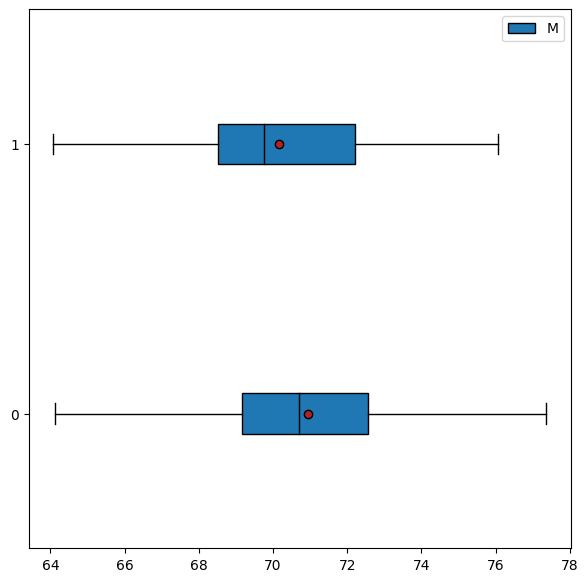

+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-
la R_Square entre les variables ramadan et frequentation est: 0.003958633410539948.


In [33]:
X = "ramadan" # qualitative
Y = "frequentation" # quantitative
afficheur_du_diagramme_d_Anova (X,Y)

##### Les jours :  ferie

In [34]:
df.ferie[df.ferie==1].count()

0

###### Petite conclusion
   - Il y a **zero** jour ferie donc une colonne unicatégorielle et donc inutile de l'étudier

##### Les jours : veille_ferie

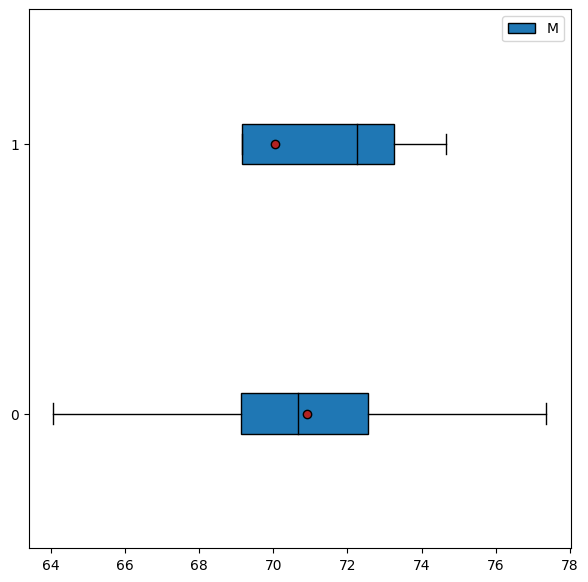

+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-
la R_Square entre les variables veille_ferie et frequentation est: 0.0008180378200436183.


In [35]:
X = "veille_ferie" # qualitative
Y = "frequentation" # quantitative
afficheur_du_diagramme_d_Anova (X,Y)

##### Les jours :  retour_ferie	vacances

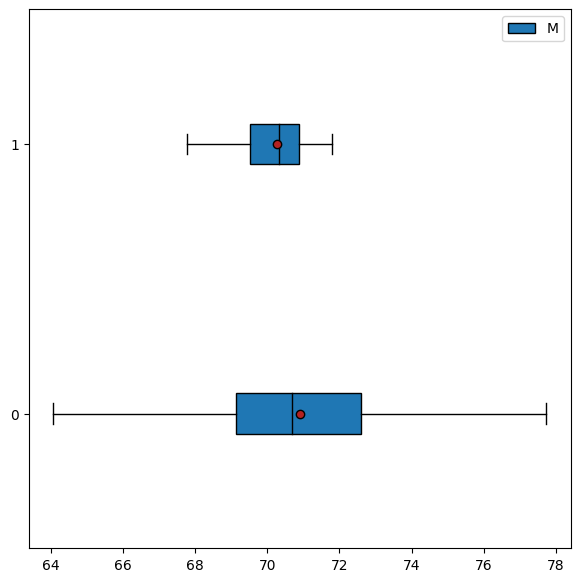

+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-
la R_Square entre les variables retour_ferie et frequentation est: 0.0010827457092984502.


In [36]:
X = "retour_ferie" # qualitative
Y = "frequentation" # quantitative
afficheur_du_diagramme_d_Anova (X,Y)

##### Les jours : vacances

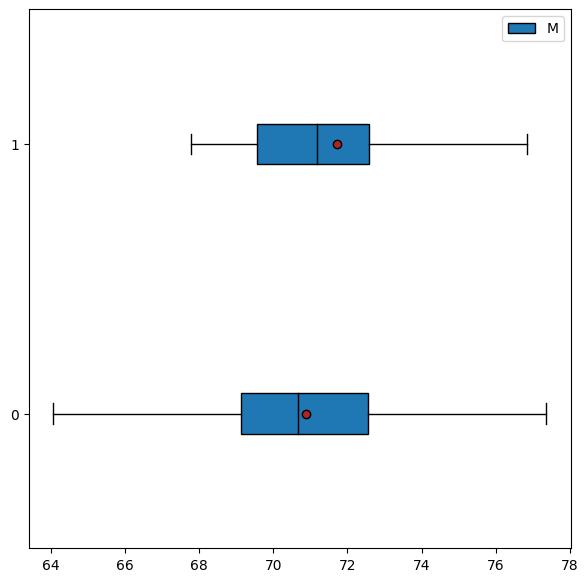

+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-
la R_Square entre les variables vacances et frequentation est: 0.002386494431914936.


In [37]:
X = "vacances" # qualitative
Y = "frequentation" # quantitative
afficheur_du_diagramme_d_Anova (X,Y)

##### Les jours :  retour_vacances

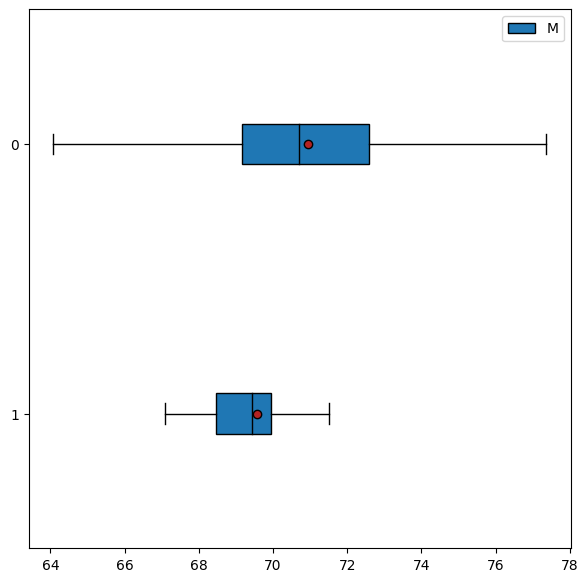

+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-
la R_Square entre les variables retour_vacances et frequentation est: 0.007246838929381291.


In [38]:
X = "retour_vacances" # qualitative
Y = "frequentation" # quantitative
afficheur_du_diagramme_d_Anova (X,Y)

##### Les jours :  veille_vacances

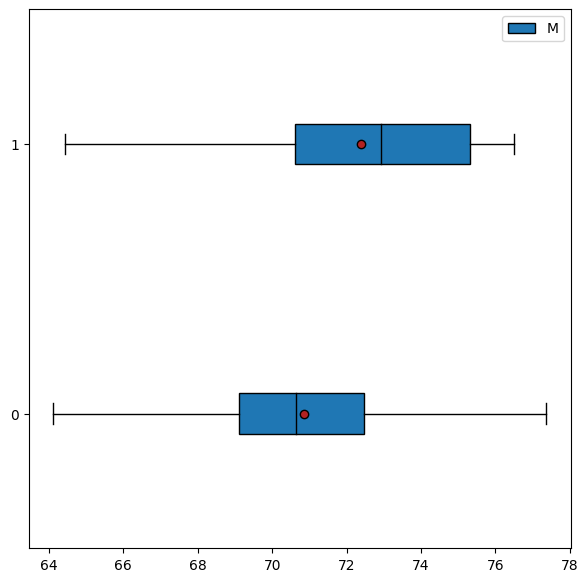

+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-
la R_Square entre les variables veille_vacances et frequentation est: 0.007891836402020565.


In [39]:
X = "veille_vacances" # qualitative
Y = "frequentation" # quantitative
afficheur_du_diagramme_d_Anova (X,Y)

##### Les jours :	fete_musulmane

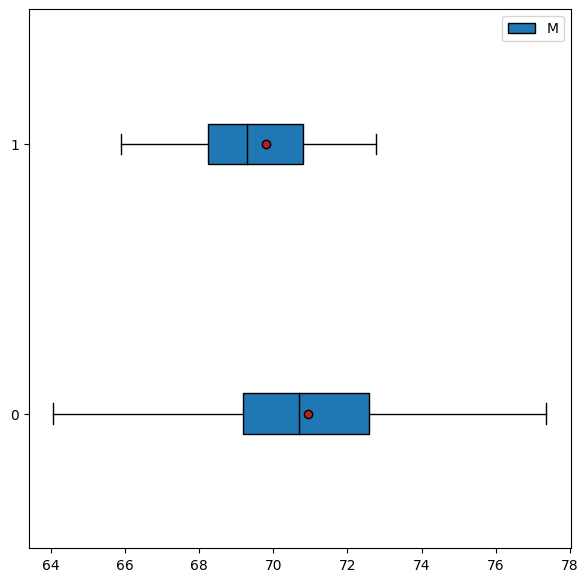

+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-
la R_Square entre les variables fete_musulmane et frequentation est: 0.0033944192791193783.


In [40]:
X = "fete_musulmane" # qualitative
Y = "frequentation" # quantitative
afficheur_du_diagramme_d_Anova (X,Y)

##### Les jours :	fete_chretienne

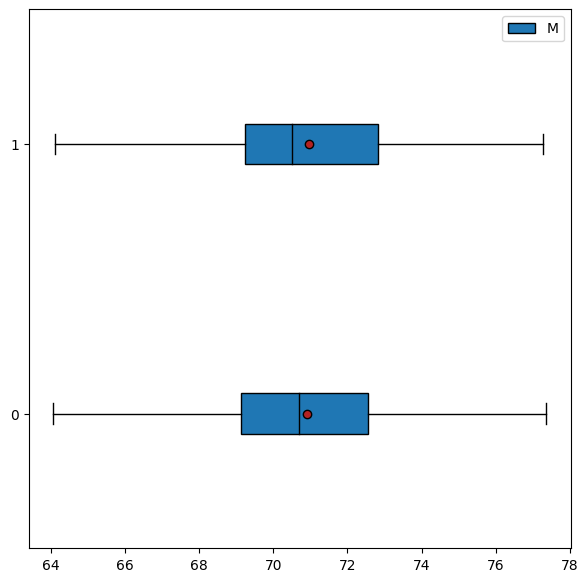

+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-
la R_Square entre les variables fete_chretienne et frequentation est: 4.341103401624614e-05.


In [41]:
X = "fete_chretienne" # qualitative
Y = "frequentation" # quantitative
afficheur_du_diagramme_d_Anova (X,Y)

##### Les jours :	fete_juive

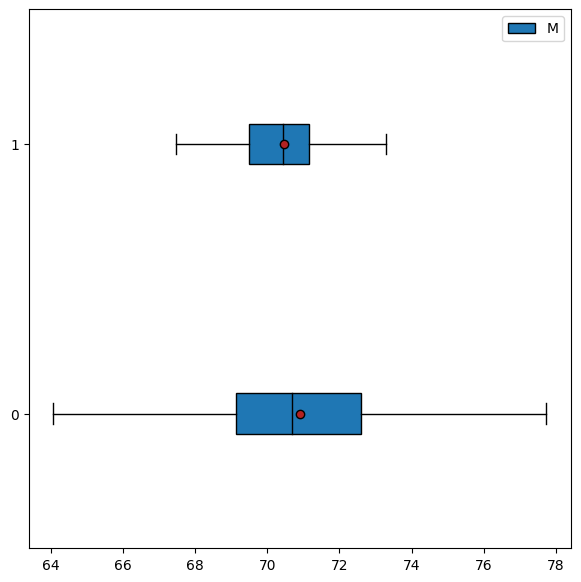

+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-
la R_Square entre les variables fete_juive et frequentation est: 0.0007268301908850271.


In [42]:
X = "fete_juive" # qualitative
Y = "frequentation" # quantitative
afficheur_du_diagramme_d_Anova (X,Y)

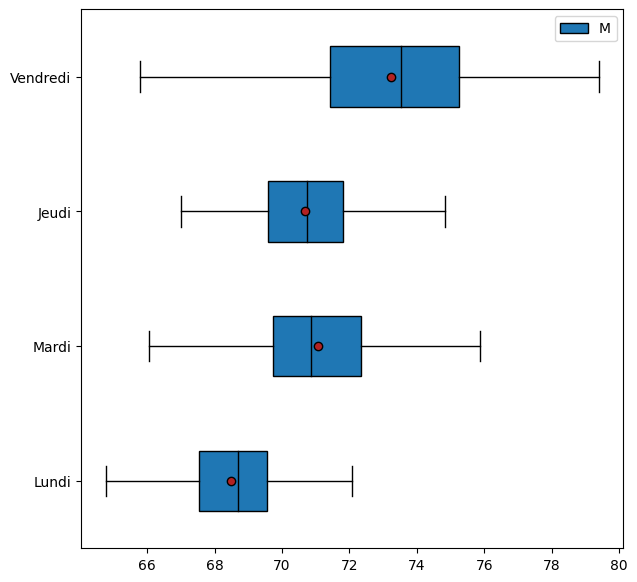

+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-+-*-
la R_Square entre les variables jour et frequentation est: 0.3616132385516222.


In [43]:
X = "jour" # qualitative
Y = "frequentation" # quantitative
afficheur_du_diagramme_d_Anova (X,Y)

# Modélisation

### Répartissons nos données d'entrainement et de test pour la modélisation

   Pour ce fait, nous utiliserons les années scolaires de **2011 À 2017** pour __entrainer notre modèle__ et les années **2018 et 2019** pour __tester notre modèle__.
   
       - Nous soulignons que notre choix de modèle s'est porté sur start_model

In [44]:
df_train = df[['effectif',"inc_gastro","prevision",'reel','noel','viande','poisson','porc','bio','mois','jour']][df.annee_scolaire.isin(['2010-2011', '2011-2012', '2012-2013', '2013-2014', '2014-2015','2015-2016', '2016-2017', '2017-2018'])]
df_test = df[['effectif',"inc_gastro","prevision",'reel','noel','viande','poisson','porc','bio','mois','jour']][df.annee_scolaire.isin(['2018-2019', '2019-2020'])]
df_test_a_prevoir = df_test [['effectif',"inc_gastro",'noel','viande','poisson','porc','bio','mois','jour']]

In [45]:
reg_multi = ols('reel ~ noel+viande+inc_gastro+poisson+porc+bio+mois+jour+effectif', data = df_train).fit() 
sm.stats.anova_lm(reg_multi)

,df,sum_sq,mean_sq,F,PR(>F)
mois,9.0,3.676567e+07,4.085074e+06,43.678814,1.030641e-64
jour,3.0,9.513376e+07,3.171125e+07,339.066023,1.264175e-145
noel,1.0,5.091200e+06,5.091200e+06,54.436603,3.758109e-13
viande,1.0,9.664752e+05,9.664752e+05,10.333837,1.354441e-03
inc_gastro,1.0,1.208352e+08,1.208352e+08,1292.005342,5.973898e-174
poisson,1.0,2.316516e+06,2.316516e+06,24.768873,7.795975e-07
porc,1.0,5.285928e+05,5.285928e+05,5.651869,1.765280e-02
bio,1.0,1.846970e+07,1.846970e+07,197.483482,1.455446e-40
effectif,1.0,3.454178e+08,3.454178e+08,3693.308722,8.624843e-315
Residual,867.0,8.108644e+07,9.352530e+04,NaN,NaN


In [46]:
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:                   reel   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     352.0
Date:                Fri, 26 May 2023   Prob (F-statistic):               0.00
Time:                        18:49:36   Log-Likelihood:                -6324.8
No. Observations:                 887   AIC:                         1.269e+04
Df Residuals:                     867   BIC:                         1.279e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -3421.6826    269.77

### On va donc maintenant retirer les variables non significatives.
##### On commence par la moins significative : bio, car elle a une p-valeur de 0.918.

In [47]:
suppression_colonne_modelisation ("bio")

/var/folders/21/1mbh6mns6s38cwt4bq4f7dl40000gn/T/ipykernel_20982/3068216858.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_a_prevoir.drop([nom], axis=1, inplace=True)


In [48]:
reg_multi = ols('reel ~ noel+viande+jour+effectif', data = df_train).fit() 

In [49]:
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:                   reel   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     793.9
Date:                Fri, 26 May 2023   Prob (F-statistic):               0.00
Time:                        18:49:36   Log-Likelihood:                -6460.8
No. Observations:                 887   AIC:                         1.294e+04
Df Residuals:                     880   BIC:                         1.297e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -3446.6140    266.276  

#### On enchaine avec le mois car sa catégorie qui nous intéressait le plus est Décembre qui plutot s'est laissée influencer par Noel.  Le moins qu'on puisse faire est de retirer les mois de mai et Novembre qui ont des p_value respectivement 0.942 et 0.868  et je jour Mardi qui a pour p_value = 0.782 pour optimiser au mieux notre modèle.

   - __Petite remarque__: Après suppression du mois de nos colonnes, la Rsquare a baissé, ce qui n'est pas notre but.

In [50]:
suppression_lignes_modelisation("mois","Mai")
suppression_lignes_modelisation("mois","Novembre")
suppression_lignes_modelisation("jour","Mardi")


/var/folders/21/1mbh6mns6s38cwt4bq4f7dl40000gn/T/ipykernel_20982/481309039.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_a_prevoir.drop(index=df_test_a_prevoir.index[df_test_a_prevoir[colonne] == valeur],inplace=True)


In [51]:
reg_multi = ols('reel ~ noel+viande+inc_gastro+porc+poisson+mois+jour+effectif', data = df_train).fit() 

In [52]:
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:                   reel   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     270.4
Date:                Fri, 26 May 2023   Prob (F-statistic):          1.03e-234
Time:                        18:49:37   Log-Likelihood:                -3855.9
No. Observations:                 538   AIC:                             7744.
Df Residuals:                     522   BIC:                             7812.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -3604.6670    348.74

#### inc_gastro maintenant qui vient de monter en p_value = 0.977 

In [53]:
suppression_colonne_modelisation("inc_gastro")

/var/folders/21/1mbh6mns6s38cwt4bq4f7dl40000gn/T/ipykernel_20982/3068216858.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_a_prevoir.drop([nom], axis=1, inplace=True)


In [54]:
reg_multi = ols('reel ~ noel+viande+porc+poisson+mois+jour+effectif', data = df_train).fit() 

In [55]:
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:                   reel   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     290.3
Date:                Fri, 26 May 2023   Prob (F-statistic):          5.92e-236
Time:                        18:49:37   Log-Likelihood:                -3855.9
No. Observations:                 538   AIC:                             7742.
Df Residuals:                     523   BIC:                             7806.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -3609.2306    309.88

#### porc maintenant

In [56]:
suppression_colonne_modelisation("porc")

/var/folders/21/1mbh6mns6s38cwt4bq4f7dl40000gn/T/ipykernel_20982/3068216858.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_a_prevoir.drop([nom], axis=1, inplace=True)


In [57]:
reg_multi = ols('reel ~ noel+viande+poisson+mois+jour+effectif', data = df_train).fit() 

In [58]:
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:                   reel   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     313.0
Date:                Fri, 26 May 2023   Prob (F-statistic):          3.66e-237
Time:                        18:49:37   Log-Likelihood:                -3856.0
No. Observations:                 538   AIC:                             7740.
Df Residuals:                     524   BIC:                             7800.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -3598.6592    308.84

#### Poisson

In [59]:
suppression_colonne_modelisation("poisson")

/var/folders/21/1mbh6mns6s38cwt4bq4f7dl40000gn/T/ipykernel_20982/3068216858.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_a_prevoir.drop([nom], axis=1, inplace=True)


In [60]:
reg_multi = ols('reel ~ noel+viande+mois+jour+effectif', data = df_train).fit() 

In [61]:
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:                   reel   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     339.6
Date:                Fri, 26 May 2023   Prob (F-statistic):          2.24e-238
Time:                        18:49:37   Log-Likelihood:                -3856.1
No. Observations:                 538   AIC:                             7738.
Df Residuals:                     525   BIC:                             7794.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -3586.6419    307.80

- Notons que garder ou non **porc** et **poisson** qui d'ailleurs influencent la frequentation d'après nos analyses, rien ne change par rapport à nos prédiction et la Rsquare non plus.

### Testons maintenant notre modele de régression linéaire

In [62]:
reel_prev = reg_multi.predict(df_test_a_prevoir)
df_test["reel_prev"]= round(reel_prev)

### Créons une colonne pour le pourcentage d'efficacité de notre modèle et calulons la moyenne de ce pourcentage.

In [63]:
df_test ["repas_gaspilles"] = df_test["reel_prev"] - df_test["reel"]
nbr_de_jours_repas_manquant = df_test.repas_gaspilles[df_test.repas_gaspilles < 0].count()
nbr_de_jours_rapas_gaspille = df_test.repas_gaspilles[df_test.repas_gaspilles > 0].count()
print(f"nombre de jours de repas manquant: {nbr_de_jours_repas_manquant}")
print(f"nombre de jours de repas gaspille: {nbr_de_jours_rapas_gaspille}")

print (f" maximum de repas manquant : {-df_test.repas_gaspilles.min()} et maximum de repas gaspillé {df_test.repas_gaspilles.max()} ")

nombre de jours de repas manquant: 28
nombre de jours de repas gaspille: 43
 maximum de repas manquant : 409.0 et maximum de repas gaspillé 2451.0 


#### On constate que malgré  les performances avec start_model, l'erreur sur la prévision est quand même grande.

### Trouvons un α pour réduire le gaspillage et le manque.

- L'objectif est d'ordre 2 :
    - réduire le nombre de jours où le repas manque
    - réduire le nombre de repas gaspillés en total
    
#### Pour ce fait :
- Nous:
    - Calculerons le nombre de jours où il y a sous-production
    - calculerons le gaspillage que pour les jour où on a fait de la surproduction et on somme le nombre de repas produit en trop

In [64]:
def α_optimizer (α) :
    df_test_copie = pd.DataFrame() # On définit cette copie pour ne pas actualiser notre vraie df_test
    df_test_copie = df_test.copy() # On lui donne la valeur de df_test avant de tester chaque α.
    df_test_copie["reel_prev"]= round((1 + α) * reel_prev)
    df_test_copie ["repas_gaspilles"] = df_test_copie["reel_prev"] - df_test_copie["reel"]
    nombre_de_jours_repas_manquant = df_test_copie.repas_gaspilles[df_test_copie.repas_gaspilles < 0].count()
    nombre_de_rapas_gaspille = df_test_copie.repas_gaspilles[df_test_copie.repas_gaspilles > 0].sum()
    print(f"nombre de jours de repas manquant: {nombre_de_jours_repas_manquant}")
    print(f"nombre de repas gaspille: {nombre_de_rapas_gaspille}")
    print (f"maximum de repas manquant au jour : {-df_test_copie.repas_gaspilles.min()} et maximum de repas gaspillé au jour {df_test_copie.repas_gaspilles.max()} ")

In [65]:
α_optimizer(α =0.0263)

nombre de jours de repas manquant: 1
nombre de repas gaspille: 39235.0
maximum de repas manquant au jour : 9.0 et maximum de repas gaspillé au jour 2853.0 


#### Après plusieurs essais, avec *α= 0.0263*, on a donc 1 seul jour où il y a manque de 9 repas et 39235 de gaspillage.

- Cette valeur n'est pas parfaite,on pourrait surement trouver mieux mais l'objectif est aussi de faire mois de gaspillage.

### On a donc pour modèle :

In [66]:
Model = lambda a_prevoir : round((1 + 0.0263) * round(reg_multi.predict(a_prevoir)))

#### Test :

In [67]:
df_test["reel_prev"]= Model(df_test_a_prevoir)
df_test ["repas_gaspilles"] = df_test ["reel_prev"] - df_test["reel"]
nombre_de_jours_repas_manquant = df_test.repas_gaspilles[df_test.repas_gaspilles < 0].count()
nombre_de_repas_gaspilles = df_test.repas_gaspilles[df_test.repas_gaspilles > 0].sum()
print(f"nombre de jours de repas manquant: {nombre_de_jours_repas_manquant}")
print(f"nombre de repas gaspillés: {nombre_de_repas_gaspilles}")
print (f" maximum de repas manquant : {-df_test.repas_gaspilles.min()} et maximum de repas gaspillé {df_test.repas_gaspilles.max()} ")

nombre de jours de repas manquant: 1
nombre de repas gaspillés: 39232.0
 maximum de repas manquant : 9.0 et maximum de repas gaspillé 2853.0 


### Comparons notre modèle à celui utilisé pour prédir dans le projet.

In [68]:
prediction = pd.DataFrame()
prediction["gaspillage_pred"] = df_test.prevision - df_test.reel

nbre_de_jours_repas_manquant = prediction.gaspillage_pred [prediction.gaspillage_pred < 0].count()
nbre_de_rapas_gaspille = prediction.gaspillage_pred [prediction.gaspillage_pred > 0].sum()
print(f"nombre de jours de repas manquants: {nbre_de_jours_repas_manquant}")
print(f"nombre de repas gaspillés: {nbre_de_rapas_gaspille}")
print (f" maximum manquant au jour : {-prediction.gaspillage_pred.min()} et maximum gaspillé au jour {prediction.gaspillage_pred.max()} ")

nombre de jours de repas manquants: 1
nombre de repas gaspillés: 58648
 maximum manquant au jour : 163 et maximum gaspillé au jour 3401 


## Analyse :

Pour notre test :

   - Le seul jour où il y a manque de nourriture est marqué par **163 repas de moins** alors que le seul jour avec notre modèle est marqué par **9 repas manqués** .
    
   - Le nombre de repas gaspillés au total est **58648** alors qu'avec notre modèle, il y a **39232** repas gaspillés donc une différence de __19416__ repas économisés, soit environs **58248€** économisés.
   
   - Les erreurs de notre modèle sont de **[-9,2853]**, un domaine inclus dans le leur __[-163,3401]__.
   

## Conclusion

   - Notre medèle est beaucoup plus fiable que le modèle utilisé pour prédire dans le projet

### FIN